# DataFun 07 – Machine Learning

**Author:** Addie Gemmell  

**GitHub Repository:**  
https://github.com/ajerineg-coder/datafun-07-ml

This project analyzes NYC January temperature data and builds a predictive regression model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Part 1 - Chart a Straight Line

In [3]:
import pandas as pd

df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


## Part 2 - Prediction

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [5]:
df.describe()

,Date,Value,Anomaly
count,124.000000,124.000000,124.000000
mean,195651.000000,37.595161,0.195161
std,3593.976442,4.539848,4.539848
min,189501.000000,26.100000,-11.300000
25%,192576.000000,34.575000,-2.825000
50%,195651.000000,37.600000,0.200000
75%,198726.000000,40.600000,3.200000
max,201801.000000,47.600000,10.200000


In [6]:
df.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [7]:
X = df[["Date"]]
y = df["Value"]

X.head()

,Date
0,189501
1,189601
2,189701
3,189801
4,189901


In [8]:
df["Year"] = df["Date"] // 100
df.head()

,Date,Value,Anomaly,Year
0,189501,34.2,-3.2,1895
1,189601,34.7,-2.7,1896
2,189701,35.5,-1.9,1897
3,189801,39.6,2.2,1898
4,189901,36.4,-1.0,1899


In [9]:
X = df[["Year"]]
y = df["Value"]

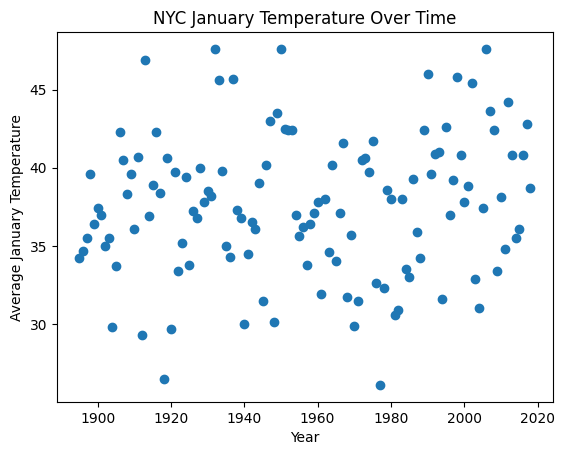

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df["Year"], df["Value"])
plt.xlabel("Year")
plt.ylabel("Average January Temperature")
plt.title("NYC January Temperature Over Time")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 8.694993233674285
Slope: 0.014771361132966164


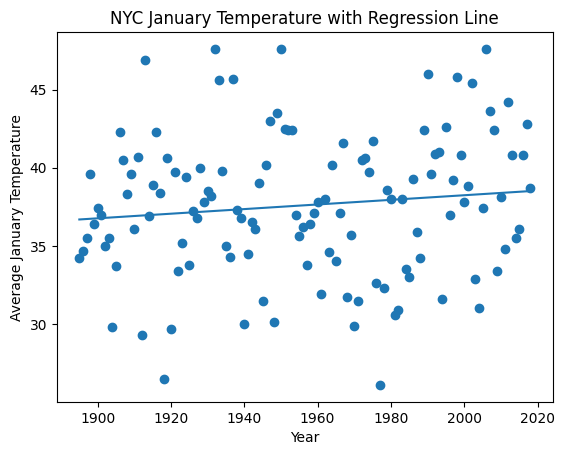

In [13]:
plt.scatter(df["Year"], df["Value"])

plt.plot(
    df["Year"],
    model.predict(X)
)

plt.xlabel("Year")
plt.ylabel("Average January Temperature")
plt.title("NYC January Temperature with Regression Line")
plt.show()

In [14]:
prediction_2024 = model.predict([[2024]])
print("Predicted Avg January Temp for 2024:", prediction_2024[0])

Predicted Avg January Temp for 2024: 38.5922281667978


/Users/addiegemmell/Documents/datafun-07-ml/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Part 3 - Prediction

In [15]:
X = df[["Year"]]
y = df["Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: -0.30779820252656265
Slope: 0.01939167329478277


In [16]:
future = pd.DataFrame({"Year": [2024]})
prediction_2024_part3 = model.predict(future)

print("Part 3 Prediction for 2024:", prediction_2024_part3[0])

Part 3 Prediction for 2024: 38.94094854611376


## Part 4 - Conclusion
After analyzing the NYC January temperature data, both regression methods showed a slight upward trend over time.

The slope is about 0.015 degrees per year, which suggests January temperatures in NYC have slowly increased over the long term. Even though individual years fluctuate a lot, the overall direction is clearly upward.

Both modeling approaches gave similar predictions for 2024, which makes the result feel more reliable. While the increase is gradual, the long-term warming trend is noticeable when looking at the full dataset.